# Magnitude Spectrum of full length recording    

### George Tzanetakis, University of Victoria 

Taking the magnitude spectrum of an entire recording (the star wars theme played by sine waves). This allows us to estimate the frequencies of the individual sine waves but provides no information about when each note takes place in time. 

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import scipy.io.wavfile as wav



In [2]:
def plot_mag_spectrum(Xmag): 
    plt.figure(figsize=(20,5))
    n = np.arange(0,len(Xmag))
    plt.plot(n,Xmag)

# load star wars played by sine waves     
srate, x = wav.read('star_wars_sine.wav')
ipd.Audio(x,rate=srate)

In [2]:
# convert so that range is from -1.0 to 1.0
if (x.dtype == 'int16'): 
    x = x / float(2 ** (16-1))

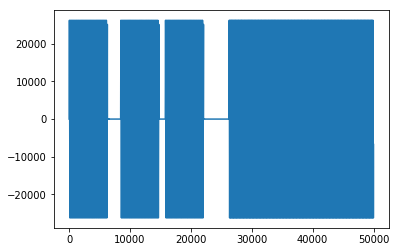

In [6]:
plt.figure()
plt.plot(x[0:50000])

We can compute the magnitude spectrum of an entire recording. Notice that the magntidue spectrum contains peaks corresponding to the sine waves of each individual pitch. Their amplitude is roughly based on the total duration of each note across the length of the entire recording but all information about the timing of each note is lost or if we want to be more precise captured in the phase spectrum. 

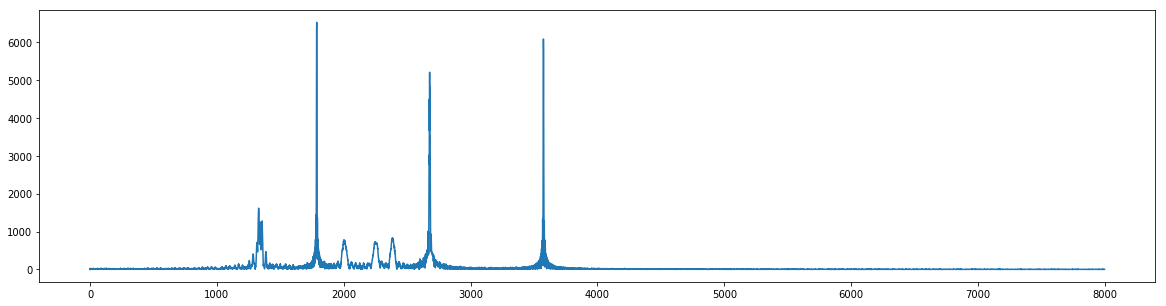

In [3]:

N = len(x)
X = np.fft.fft(x)
Xmag = 2 * np.abs(X) / N 
plot_mag_spectrum(Xmag[1:8000])

Let's now look at taking short segments of the input audio signal and compute separately the magnitude spectrum of each segment. This is called the Short Time Fourier Transform (STFT). Notice that only one note of the star wars theme is contained in this short segment. 

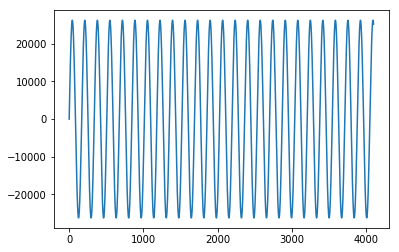

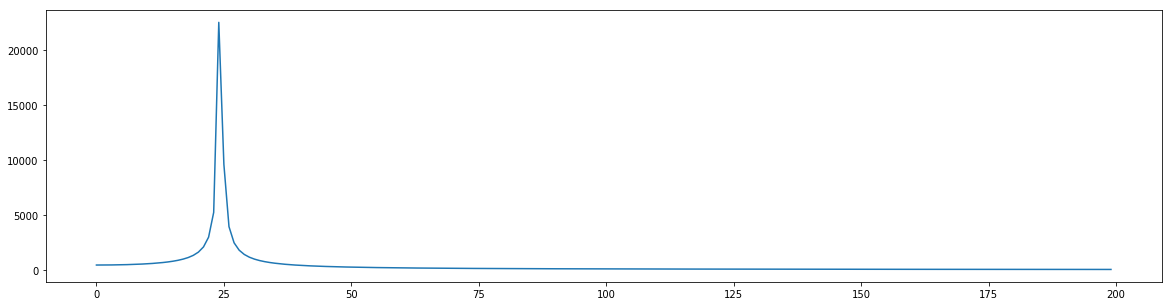

In [5]:
window_size = 4096
frame_index = 0
sx = x[frame_index * window_size: (frame_index+1)*window_size]
plt.figure()
plt.plot(sx)
Xmag  = 2 * np.abs(np.fft.fft(sx)) /len(sx)
plot_mag_spectrum(Xmag[0:200])

Let's look at another segment. This segment has a duration of $4096 /44100 \approx 90 \;\text{msecs}$ and starts at $20 * 4096 / 44100 \approx 1.85 \;\text{secs}$. Notice that this segment contains the parts of two different sinusoid pitches as well as some silence. This can be seen in the associated zoomed magnitude spectrum plot. 

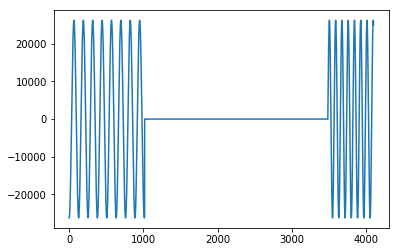

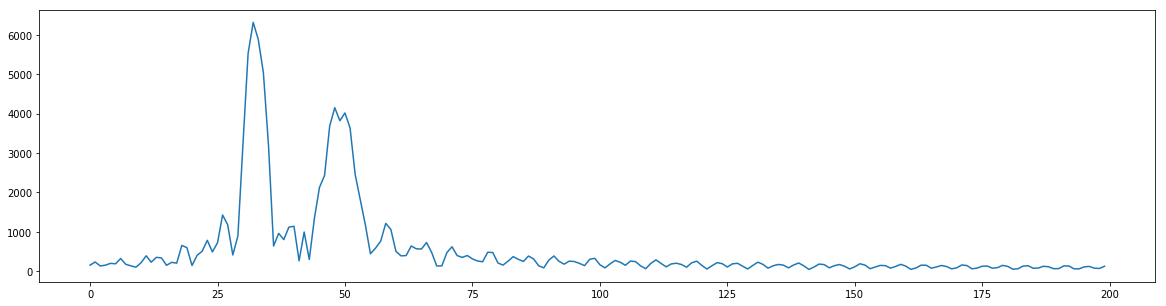

In [37]:
window_size = 4096
frame_index = 20
sx = x[frame_index * window_size: (frame_index+1)*window_size]
plt.figure()
plt.plot(sx)
Xmag  = 2 * np.abs(np.fft.fft(sx)) /len(sx)
plot_mag_spectrum(Xmag[0:200]) 

Now lets look at the effect of windowing. If we just take a segment of the time domain signal then there is no guarantee that the end points will match when the segment is repeated - this corresponds to multiplying with a rectangular window. If we apply a "windowing" function that tapers at the end points we avoid this problem but now our spectrum is affected by the windowing process. Without going into details different types of windows have slightly different effects but in general provide more accurate magnitude spectra than using rectangular windows. 

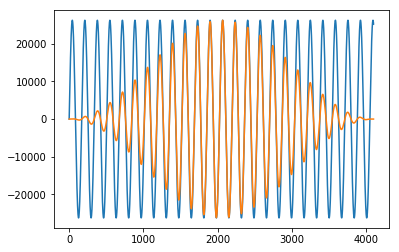

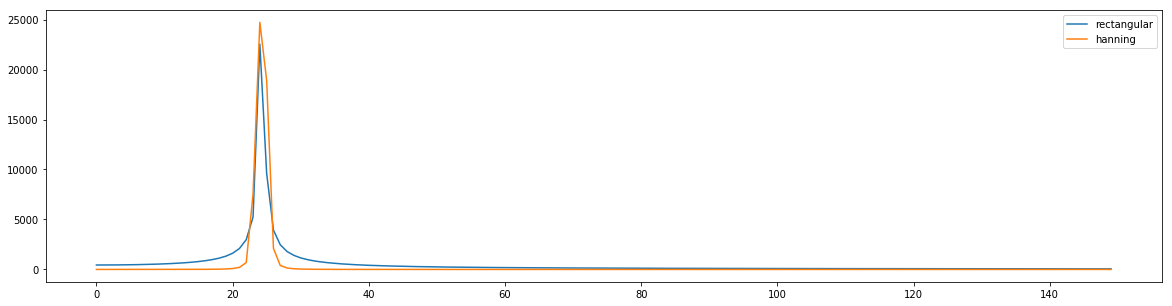

In [7]:
def plot_mag_spectrums(Xmag, wXmag): 
    plt.figure(figsize=(20,5))
    n = np.arange(0,len(Xmag))
    plt.plot(n,Xmag)
    plt.plot(n,wXmag)
    plt.legend(['rectangular', 'hanning'])


window_size = 4096
frame_index = 0
sx = x[frame_index * window_size: (frame_index+1)*window_size]
wx = np.hanning(window_size)wsx = np.multiply(sx,wx)
plt.figure()
plt.plot(sx)
plt.plot(wsx)
Xmag  = 2 * np.abs(np.fft.fft(sx)) /len(sx)
wXmag = 2 * np.abs(np.fft.fft(wsx)) / len(wsx)
plot_mag_spectrums(Xmag[0:150], 2 * wXmag[0:150])